# Exploratory Data Analysis(EDA)

## Easy look

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency

# File path
file_path = '/home/lee/workspace/STATISTICAL-CONSULTING_113-2/HW2/mushroom/primary_data.csv'

# Read the CSV file with semicolon as delimiter
df = pd.read_csv(file_path, delimiter=';')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)

Dataset Shape: (173, 23)


In [2]:
print("Column Names:")
for col in df.columns:
    print(f"- {col}")

Column Names:
- family
- name
- class
- cap-diameter
- cap-shape
- Cap-surface
- cap-color
- does-bruise-or-bleed
- gill-attachment
- gill-spacing
- gill-color
- stem-height
- stem-width
- stem-root
- stem-surface
- stem-color
- veil-type
- veil-color
- has-ring
- ring-type
- Spore-print-color
- habitat
- season


In [3]:
print("Data Types:")
print(df.dtypes)

Data Types:
family                  object
name                    object
class                   object
cap-diameter            object
cap-shape               object
Cap-surface             object
cap-color               object
does-bruise-or-bleed    object
gill-attachment         object
gill-spacing            object
gill-color              object
stem-height             object
stem-width              object
stem-root               object
stem-surface            object
stem-color              object
veil-type               object
veil-color              object
has-ring                object
ring-type               object
Spore-print-color       object
habitat                 object
season                  object
dtype: object


In [4]:
print("Missing Values Count:")
print(df.isna().sum())

Missing Values Count:
family                    0
name                      0
class                     0
cap-diameter              0
cap-shape                 0
Cap-surface              40
cap-color                 0
does-bruise-or-bleed      0
gill-attachment          28
gill-spacing             71
gill-color                0
stem-height               0
stem-width                0
stem-root               146
stem-surface            108
stem-color                0
veil-type               164
veil-color              152
has-ring                  0
ring-type                 7
Spore-print-color       155
habitat                   0
season                    0
dtype: int64


In [5]:
print("\nCount of Mushrooms by Family:")
family_counts = df['family'].value_counts()
print(family_counts)


Count of Mushrooms by Family:
family
Tricholoma Family         43
Russula Family            27
Bolete Family             14
Ink Cap Family            13
Cortinarius Family        11
Stropharia Family          8
Amanita Family             8
Wax Gill Family            8
Entoloma Family            7
Bracket Fungi              7
Mushroom Family            5
Bolbitius Family           3
Lepiota Family             3
Paxillus Family            3
Chanterelle Family         3
Pluteus Family             2
Oyster Mushroom Family     2
Crepidotus Family          1
Hydnum Family              1
Ear-Pick Family            1
Saddle-Cup Family          1
Morel Family               1
Jelly Discs Family         1
Name: count, dtype: int64


In [6]:
# Count of edible vs poisonous mushrooms
print("\nCount of Edible vs Poisonous Mushrooms:")
class_counts = df['class'].value_counts()
print(class_counts)
print("\nPercentage of Edible vs Poisonous Mushrooms:")
print(class_counts / len(df) * 100)


Count of Edible vs Poisonous Mushrooms:
class
p    96
e    77
Name: count, dtype: int64

Percentage of Edible vs Poisonous Mushrooms:
class
p    55.491329
e    44.508671
Name: count, dtype: float64


In [7]:
# Function to extract average from range values
def extract_average(range_str):
    if pd.isna(range_str) or range_str == '':
        return np.nan
    try:
        # Remove brackets and split by comma
        range_str = str(range_str).strip('[]')
        values = [float(x.strip()) for x in range_str.split(',')]
        return sum(values) / len(values)
    except:
        return np.nan

# Process range columns
range_columns = ['cap-diameter', 'stem-height', 'stem-width']
for col in range_columns:
    if col in df.columns:
        df[f'{col}_avg'] = df[col].apply(extract_average)

# Basic statistics for processed numerical columns
print("\nBasic Statistics for Numerical Features:")
numerical_cols = [col for col in df.columns if col.endswith('_avg')]
if numerical_cols:
    print(df[numerical_cols].describe())


Basic Statistics for Numerical Features:
       cap-diameter_avg  stem-height_avg  stem-width_avg
count        173.000000       173.000000      173.000000
mean           6.739306         6.589595       12.157514
std            5.140185         3.264824        9.858009
min            0.700000         0.000000        0.000000
25%            3.500000         4.500000        5.500000
50%            6.000000         6.000000       10.000000
75%            8.500000         7.500000       15.000000
max           50.000000        25.000000       70.000000


## Table 1

In [8]:
# Fixed function to analyze feature association with edibility
def analyze_feature_edibility(df, feature):
    """
    Analyze the association between a feature and mushroom edibility
    without using crosstab which has issues with duplicate labels.
    """
    if feature not in df.columns:
        return None
    
    # Create a copy to avoid modifying the original data
    result = {"Feature values": [], "Edible count": [], "Poisonous count": []}
    
    # Process the feature values
    for value in df[feature].dropna().unique():
        # For features with multiple values like "[e, o]"
        value_str = str(value).strip('[]')
        values = [v.strip() for v in value_str.split(',')]
        
        for v in values:
            if v not in result["Feature values"]:
                # Filter rows with this feature value
                matches = df[df[feature].str.contains(v, na=False)]
                
                # Count edible and poisonous mushrooms
                edible_count = len(matches[matches['class'] == 'e'])
                poisonous_count = len(matches[matches['class'] == 'p'])
                
                # Add to results
                result["Feature values"].append(v)
                result["Edible count"].append(edible_count)
                result["Poisonous count"].append(poisonous_count)
    
    # Convert to DataFrame for better display
    result_df = pd.DataFrame(result)
    
    # Calculate total and percentages
    result_df["Total"] = result_df["Edible count"] + result_df["Poisonous count"]
    result_df["% Edible"] = (result_df["Edible count"] / result_df["Total"] * 100).round(1)
    result_df["% Poisonous"] = (result_df["Poisonous count"] / result_df["Total"] * 100).round(1)
    
    return result_df

# Analyze important features
print("Table1:")
important_features = ['cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'has-ring', 'cap-shape', 'gill-color']

for feature in important_features:
    if feature in df.columns:
        print(f"\nAssociation between {feature} and edibility:")
        result = analyze_feature_edibility(df, feature)
        if result is not None:
            print(result)


print("\nAnalysis completed!")

Table1:

Association between cap-color and edibility:
   Feature values  Edible count  Poisonous count  Total  % Edible  % Poisonous
0               e             7               18     25      28.0         72.0
1               o             7               15     22      31.8         68.2
2               n            53               57    110      48.2         51.8
3               g            14               14     28      50.0         50.0
4               r             2               11     13      15.4         84.6
5               w            17               18     35      48.6         51.4
6               y            16               28     44      36.4         63.6
7               p             4                7     11      36.4         63.6
8               b             5                2      7      71.4         28.6
9               u             5                5     10      50.0         50.0
10              l             4                2      6      66.7         33.

## plot

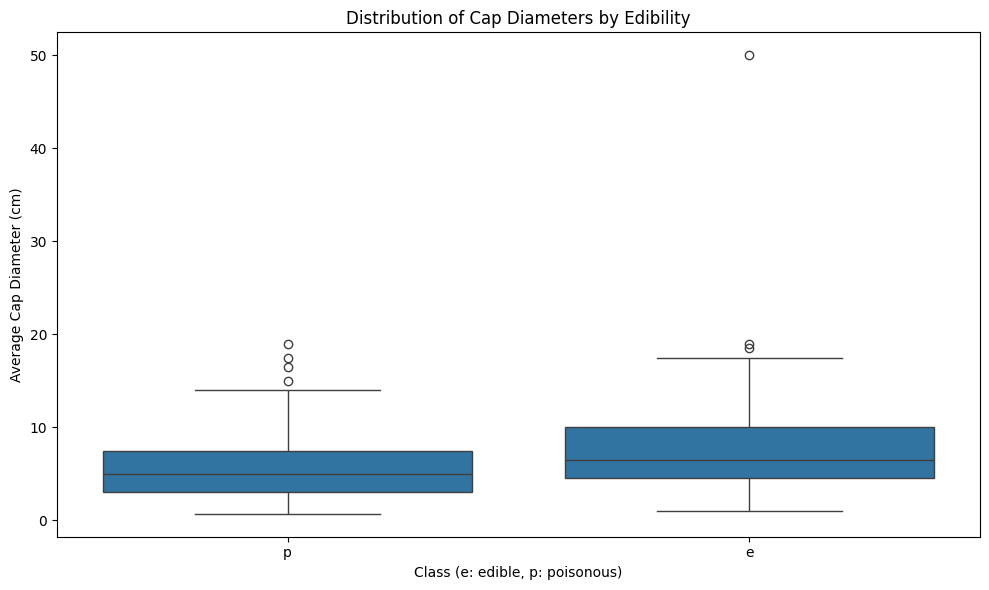

In [9]:
plt.figure(figsize=(10, 6))
if 'cap-diameter_avg' in df.columns:
    sns.boxplot(x='class', y='cap-diameter_avg', data=df)
    plt.title('Distribution of Cap Diameters by Edibility')
    plt.xlabel('Class (e: edible, p: poisonous)')
    plt.ylabel('Average Cap Diameter (cm)')
    plt.tight_layout()

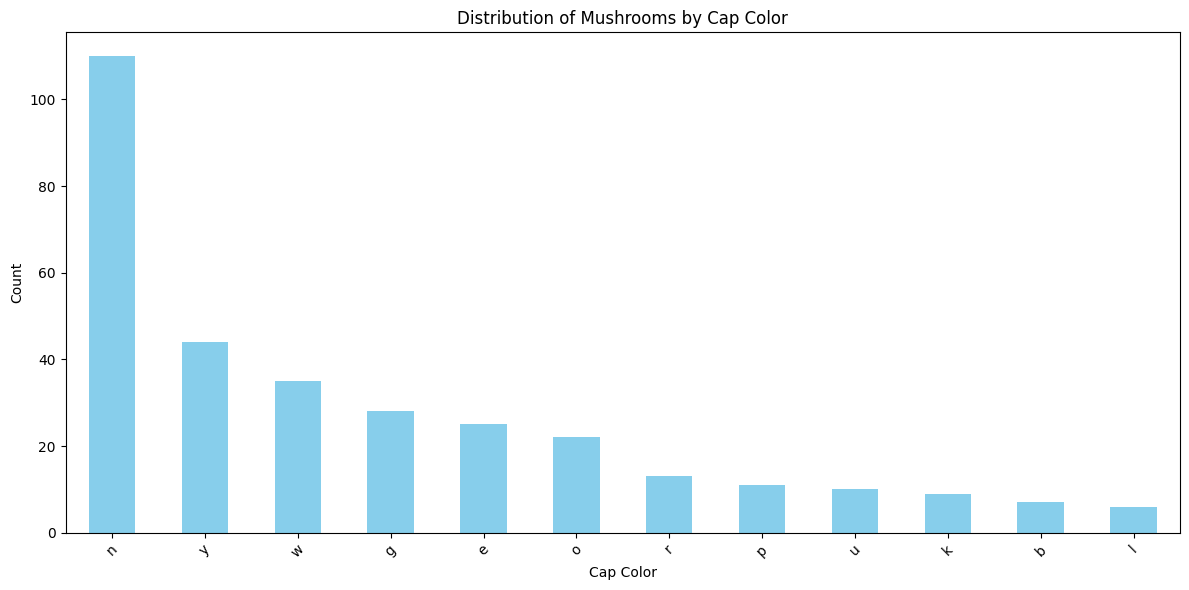

In [10]:
plt.figure(figsize=(12, 6))
if 'cap-color' in df.columns:
    # Process multi-value fields properly
    cap_colors = []
    for color_str in df['cap-color'].dropna():
        # Remove brackets and split by comma
        colors = str(color_str).strip('[]').split(',')
        cap_colors.extend([c.strip() for c in colors])
    
    cap_color_counts = pd.Series(cap_colors).value_counts()
    cap_color_counts.plot(kind='bar', color='skyblue')
    plt.title('Distribution of Mushrooms by Cap Color')
    plt.xlabel('Cap Color')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()

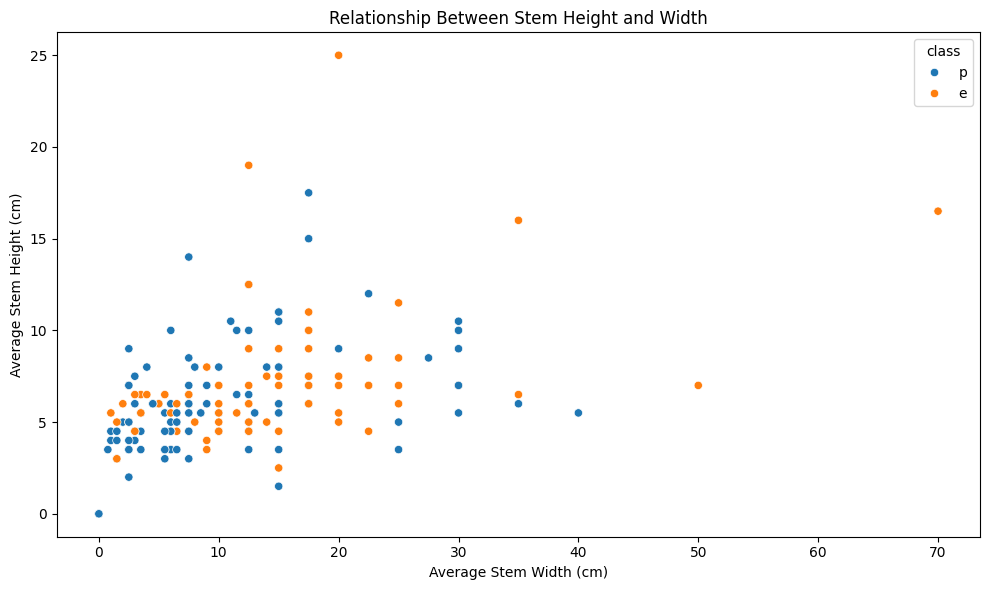

In [11]:
plt.figure(figsize=(10, 6))
if 'stem-height_avg' in df.columns and 'stem-width_avg' in df.columns:
    sns.scatterplot(x='stem-width_avg', y='stem-height_avg', hue='class', data=df)
    plt.title('Relationship Between Stem Height and Width')
    plt.xlabel('Average Stem Width (cm)')
    plt.ylabel('Average Stem Height (cm)')
    plt.tight_layout()

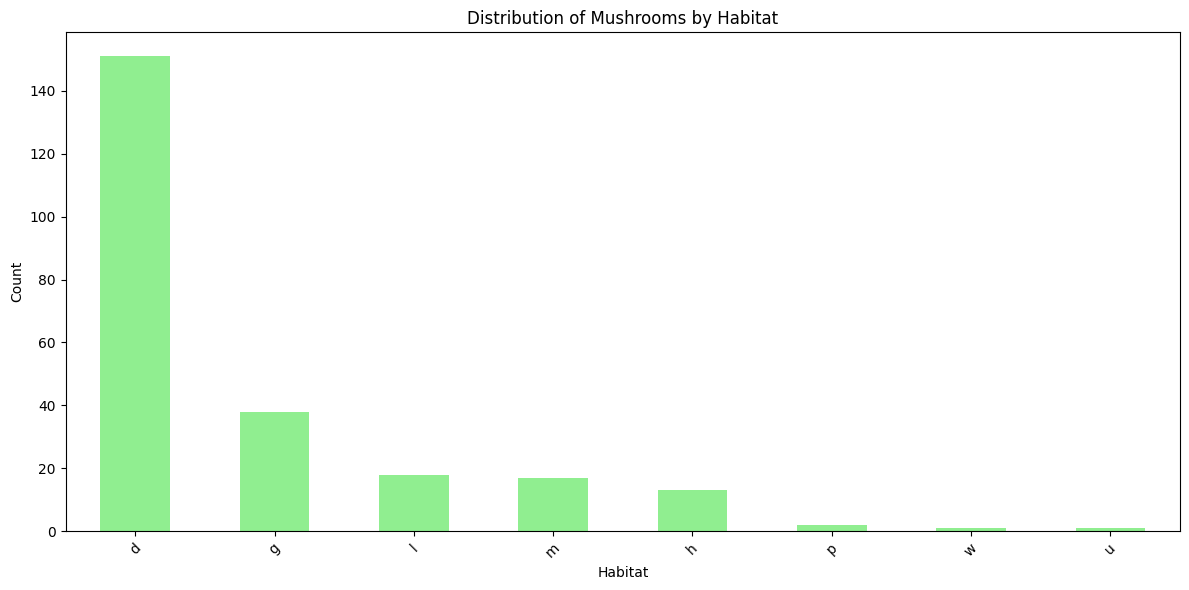

In [12]:
plt.figure(figsize=(12, 6))
if 'habitat' in df.columns:
    # Process multi-value fields properly
    habitats = []
    for habitat_str in df['habitat'].dropna():
        # Remove brackets and split by comma
        habitat_list = str(habitat_str).strip('[]').split(',')
        habitats.extend([h.strip() for h in habitat_list])
    
    habitat_counts = pd.Series(habitats).value_counts()
    habitat_counts.plot(kind='bar', color='lightgreen')
    plt.title('Distribution of Mushrooms by Habitat')
    plt.xlabel('Habitat')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()

<Figure size 1200x600 with 0 Axes>

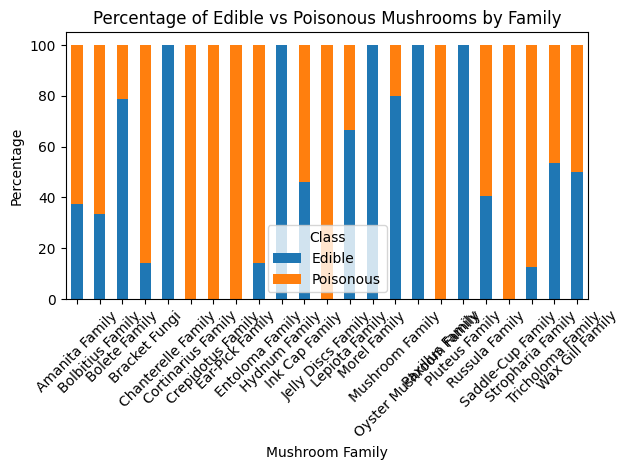

In [13]:
plt.figure(figsize=(12, 6))
edibility_by_family = pd.crosstab(df['family'], df['class'])
edibility_by_family_pct = edibility_by_family.div(edibility_by_family.sum(axis=1), axis=0) * 100
edibility_by_family_pct.plot(kind='bar', stacked=True)
plt.title('Percentage of Edible vs Poisonous Mushrooms by Family')
plt.xlabel('Mushroom Family')
plt.ylabel('Percentage')
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.xticks(rotation=45)
plt.tight_layout()